In [91]:
import io
import numpy as np
from glob import glob
import os

In [66]:
from Levenshtein import distance

In [4]:
data_folder = "../data/fasttext"

In [3]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import FastText

In [60]:
from gensim.models.fasttext import load_facebook_vectors, load_facebook_model

In [65]:
de_model = KeyedVectors.load_word2vec_format(f"{data_folder}/wiki.multi.de.vec")

In [67]:
d = de_model.most_similar("einwanderung")

In [ ]:
word = "

In [68]:
for t1, t2 in d:
    print(t1,t2)

zuwanderung 0.8597495555877686
einwandern 0.845491886138916
einwanderungswelle 0.8374655246734619
einwanderten 0.8240244388580322
einwanderungswellen 0.8223201632499695
einwanderte 0.8159754276275635
einwanderungsland 0.8100988864898682
einwandernden 0.8077513575553894
einwanderungspolitik 0.8063525557518005
einwanderer 0.7933803796768188


In [100]:
list(de_model["zuwanderung"])

[-0.0671942,
 -0.0366212,
 -0.0312243,
 0.0444683,
 -0.0211189,
 -0.0291673,
 0.0151297,
 -0.016129,
 0.00688572,
 0.0591264,
 -0.0857524,
 0.0717244,
 -0.0271129,
 0.00605848,
 8.01488e-05,
 -0.103427,
 -0.036594,
 -0.00272372,
 0.111109,
 0.00219393,
 3.03583e-05,
 0.0608861,
 0.00954995,
 -0.0177735,
 -0.10008,
 0.0204656,
 0.000752253,
 -0.0161908,
 0.0333475,
 0.0314585,
 -0.0447806,
 0.0737337,
 -0.198921,
 0.0264356,
 -0.00561559,
 -0.0852847,
 0.0604964,
 -0.0527879,
 0.0862767,
 0.0181526,
 -0.00856526,
 -0.052943,
 -0.0146524,
 -0.031096,
 0.168863,
 0.0328305,
 0.0883069,
 0.0241561,
 0.0120933,
 -0.0190448,
 -0.0290345,
 -0.0241948,
 0.0146055,
 0.0372949,
 -0.0547356,
 0.0579814,
 -0.0704046,
 0.0290963,
 -0.0216147,
 0.0302485,
 -0.0980019,
 -0.0145801,
 0.0778326,
 -0.0694056,
 0.0198462,
 -0.00419028,
 0.0096243,
 0.00847076,
 -0.0399989,
 0.0467276,
 0.0888406,
 0.0606074,
 0.157478,
 -0.0169431,
 -0.0743497,
 -0.0493339,
 0.00835836,
 -0.0527037,
 0.00790972,
 -0.0007

In [95]:
# filter the fasttext embeddings with existing vocab

german_vocab = []
for file in glob(f"../data/tp/eu/de/*/vocab.pkl", recursive=True):
    with open(file, "rb") as f:
        vocab = pickle.load(f)
        print(len(vocab))
        german_vocab+=vocab

8608
5613
4353
6980
5320
1582


In [96]:
len(german_vocab)

32456

In [97]:
german_vocab_list=list(set(german_vocab))
len(german_vocab_list)

12045

In [102]:
counter = 0
with open("../data/fasttext/de.vec", "w") as f:
    for word in vocab:
        try:
            vec = list(de_model[word])
            f.write(word + ' ')
            vec_str = ['%.9f' % val for val in vec]
            vec_str = " ".join(vec_str)
            f.write(vec_str + '\n')
        except Exception as msg:
            print(msg)
            counter+=1


"Key 'eudebate2014' not present"
"Key 'mosmaiorum' not present"
"Key 'oecdstudie' not present"
"Key 'kustenwache' not present"
"Key 'zuwander' not present"
"Key 'eidgenosse' not present"
"Key 'eulandern' not present"
"Key 'arivadpaafx' not present"
"Key 'auerdem' not present"
"Key 'hartzivhilfen' not present"
"Key 'auengrenzen' not present"
"Key 'zweiwochige' not present"
"Key 'ubernehmen' not present"
"Key 'eumanahmen' not present"
"Key 'abst14' not present"
"Key 'paritatischer' not present"
"Key 'fluchtlingskrise' not present"
"Key 'stadte' not present"
"Key 'verscharft' not present"
"Key 'gegenuber' not present"
"Key 'fluchtlingsproblem' not present"
"Key 'eufluchtlingskommissar' not present"
"Key 'euauslandern' not present"
"Key 'rugt' not present"
"Key 'googleglass' not present"
"Key 'eueinwanderungsregelung' not present"
"Key 'ohlauer' not present"
"Key 'eueinwanderern' not present"
"Key 'auerhalb' not present"
"Key 'neuverhandlung' not present"
"Key 'fluchtlingswelle' not presen

In [103]:
counter

450

In [ ]:
with open(args.emb_file, 'w') as f:
    for v in list(model.wv.vocab):
        vec = list(model.wv.__getitem__(v))
        f.write(v + ' ')
        vec_str = ['%.9f' % val for val in vec]
        vec_str = " ".join(vec_str)
        f.write(vec_str + '\n')

In [72]:
import pickle

In [73]:
def load_vec_skipgram(emb_path):
    with open("../data/tp/eu/de/de_Twitter_2017/vocab.pkl", "rb") as f:
        vocab = pickle.load(f)
    wv = KeyedVectors.load(emb_path)
    vectors = []
    word2id = {}
    id2word = {}
    for idx, word in enumerate(vocab):
        vectors.append(wv[word])
        word2id[word]=idx
        id2word[idx]=word
    
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [1]:
path = "../data/tp/eu/de/de_Twitter_2017/embeddings.wordvectors"

In [5]:
wv = KeyedVectors.load(path)

In [ ]:
wv.key_to_index

In [8]:
wv["eu"]

array([-1.50230438e-01, -9.13807750e-02, -8.98024254e-03,  3.29172254e-01,
       -2.40479216e-01, -3.04896891e-01,  1.75614029e-01,  7.48506129e-01,
        7.15180784e-02, -2.33823489e-02,  5.42639829e-02, -1.96728244e-01,
        1.75030380e-02,  1.19235583e-01, -1.53169155e-01, -2.21518949e-01,
        9.85714570e-02,  1.26449585e-01,  4.19740453e-02, -2.16417819e-01,
        2.98321377e-02,  2.04325944e-01,  2.82998443e-01,  1.94490999e-01,
        2.10274473e-01, -6.07947400e-03, -3.15082580e-01, -1.47814333e-01,
        2.04700828e-01, -1.46266699e-01, -3.30586880e-01,  7.79478699e-02,
        2.41924852e-01, -3.11020404e-01,  1.83814898e-01,  5.07534528e-03,
        9.49470922e-02, -2.07519531e-01,  1.98949516e-01,  4.38904613e-02,
       -1.64492473e-01, -7.71602690e-02, -1.38021186e-01,  4.25603539e-02,
        2.85866298e-02, -1.33240178e-01,  9.82051268e-02,  1.47027582e-01,
       -1.68967187e-01,  2.94092804e-01, -1.91845566e-01, -2.18852162e-02,
       -1.56187937e-01, -

In [3]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [74]:
src_path =f"{data_folder}/wiki.multi.de.vec"
tgt_path ="../data/tp/eu/de/de_Twitter_2017/embeddings.wordvectors"

In [75]:
nmax = 50000

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec_skipgram(tgt_path)

In [76]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [77]:
# printing nearest neighbors in the source space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "cat":
1.0000 - cat
0.5942 - cats
0.5049 - katze
0.5004 - fat
0.4863 - dog


In [79]:
# printing nearest neighbors in the source space
src_word = 'migration'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "migration":
1.0000 - migration
0.8045 - immigration
0.7227 - integration
0.6981 - migranten
0.6902 - einwanderung


In [78]:
# printing nearest neighbors in the source space
tgt_word = 'migration'
get_nn(tgt_word, tgt_embeddings, tgt_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "migration":
1.0000 - migration
0.4298 - wachstum
0.3771 - bm
0.3757 - inner
0.3635 - kontaktgruppe


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.17


In [87]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(20, 20), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

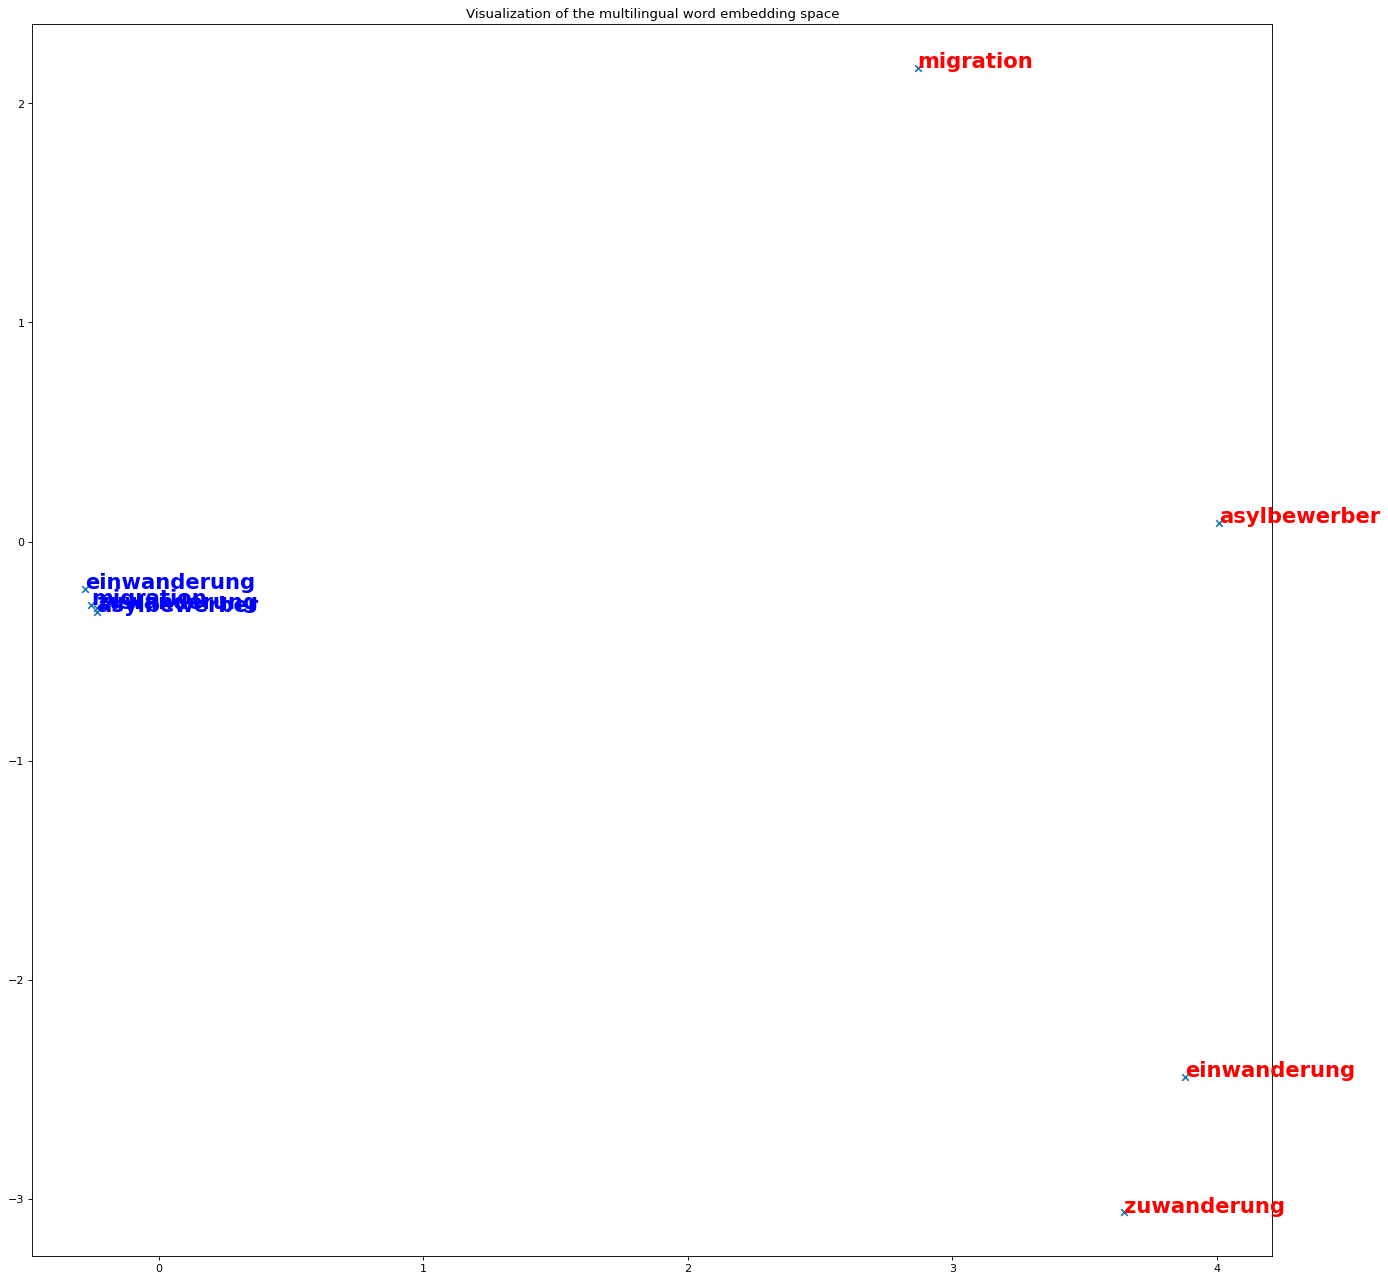

In [88]:
# get 5 random input words
src_words = ['asylbewerber', 'migration', 'einwanderung', "zuwanderung"]
tgt_words = ['asylbewerber', 'migration', 'einwanderung', "zuwanderung"]
# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % tw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)